In [119]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import re  # Import the regular expressions module for pattern matching and text processing
from scipy import stats  # Import stats module for Z-score
import matplotlib.pyplot as plt  # For plotting data
import seaborn as sns  # For enhanced data visualizations

# Import libraries for machine learning models and evaluation
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling numerical data and encoding categorical data
from sklearn.linear_model import LinearRegression, ElasticNet  # For linear Regression
from sklearn.tree import DecisionTreeRegressor  # For Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor  # For Random Forest Regression
from sklearn.svm import SVR  # For Support Vector Regression 
#import xgboost as xgb # For XGBoost Regression
from sklearn.model_selection import cross_validate  # To perform cross-validation
from sklearn.metrics import mean_squared_error, r2_score, make_scorer  # For model evaluation metrics
from sklearn.model_selection import GridSearchCV  

In [121]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
plt.rcParams['figure.figsize'] = [10, 6]

In [123]:
# Load the dataset
data = pd.read_csv("Electric_cars_dataset.csv", encoding="latin-1")
'''
"encoding='latin-1'" is used to handle special characters in the dataset  
This ensures that the dataset is read correctly, especially if it contains special characters like é, ñ, ü, etc.
'''
# Display the first few rows of the dataset
data.head()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


In [125]:
data = data.sample(1000)

In [127]:
# Display 10 random rows of the dataset
data.sample(10)

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
62536,EV18421,5YJYGDEE3L,Snohomish,BOTHELL,WA,98012.0,2020.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,44.0,110751896,POINT (-122.201515 47.843376),PUGET SOUND ENERGY INC,72
42184,EV17937,1N4AZ0CP4E,Whatcom,BELLINGHAM,WA,98229.0,2014.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,40.0,243229822,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,19
5719,EV82119,KNDCC3LC7K,Pierce,PUYALLUP,WA,98374.0,2019.0,KIA,NIRO PLUG-IN HYBRID,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,28500,25.0,1870564,POINT (-122.265368 47.133331),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),22
52275,EV82782,5YJSA1E14H,King,KIRKLAND,WA,98033.0,2017.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,48.0,202135146,POINT (-122.188994 47.678406),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),60
83,EV73080,KNDCM3LD4K,Jefferson,PORT TOWNSEND,WA,98368.0,2019.0,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,24.0,3645330,POINT (-122.818016 48.080229),BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...,25
1887,EV79780,1N4BZ0CP2H,King,KIRKLAND,WA,98033.0,2017.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,107,0,48.0,262650790,POINT (-122.188994 47.678406),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),19
49945,EV21324,WVWKR7AU9K,King,REDMOND,WA,98052.0,2019.0,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,125,0,45.0,297167258,POINT (-122.122018 47.678465),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),22.2
5748,EV46991,1N4AZ0CP6G,King,REDMOND,WA,98052.0,2016.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,48.0,229961574,POINT (-122.122018 47.678465),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),27
51447,EV54657,SADHD2S19K,Clark,VANCOUVER,WA,98685.0,2019.0,JAGUAR,I-PACE,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,234,0,18.0,269467663,POINT (-122.686329 45.713105),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,52.9
11733,EV34376,5YJ3E1EB9N,King,SEATTLE,WA,98117.0,2022.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,192408926,POINT (-122.379354 47.687571),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),64


In [129]:
# Display a concise summary of the dataframe, including the number of non-null entries and the data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 39347 to 28856
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 1000 non-null   object 
 1   VIN (1-10)                                         1000 non-null   object 
 2   County                                             1000 non-null   object 
 3   City                                               1000 non-null   object 
 4   State                                              999 non-null    object 
 5   ZIP Code                                           1000 non-null   float64
 6   Model Year                                         1000 non-null   float64
 7   Make                                               1000 non-null   object 
 8   Model                                              1000 non-null   object 
 9   Electric

In [172]:
data.isnull().sum() #to know the number of missing values in the data set 

ID                                                    0
VIN (1-10)                                            0
County                                                0
City                                                  0
State                                                 1
ZIP Code                                              0
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Legislative District                                  5
DOL Vehicle ID                                        0
Vehicle Location                                      8
Electric Utility                                     13
Expected_Price                                  

In [190]:
#replace numerical columns with the mean 
#replace categorial columns with the mode 

avg_Legislative_District = data['Legislative District'].astype('float').mean(axis=0)
print("Average_Legislative_District:", avg_Legislative_District)
data['Legislative District'].replace(np.nan, avg_Legislative_District , inplace=True)

Average_Legislative_District: 29.709547738693466


In [192]:
data["Legislative District"].isnull().sum()
# to check the number of missing values in a column 

0

In [194]:
data['Electric Utility'].value_counts() # calls out unique values and how mamy times they occur 

Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                                         351
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                                          200
PUGET SOUND ENERGY INC                                                                                180
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                                       59
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY                        58
PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY                                                     30
BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY                                             13
BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY                             11
PUD NO 1 OF CHELAN COUNTY                                                                               8
MODERN ELECTRIC WATER COMPANY

In [208]:
#replacing missing value in categorical using mode
avg_Electric_Utility = data['Electric Utility'].astype('object').mode() 
print("Electric Utility:", avg_Electric_Utility)
data['Electric Utility'].replace(np.nan, avg_Electric_Utility[0], inplace=True)

Electric Utility: 0    PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
Name: Electric Utility, dtype: object


In [210]:
data['Electric Utility'].isnull().sum() # to confirm if the missing values have been replced

0

In [212]:
data['Vehicle Location'].value_counts()

Vehicle Location
POINT (-122.227947 47.565443)    19
POINT (-122.122018 47.678465)    19
POINT (-122.296466 47.631708)    19
POINT (-122.132064 47.494834)    17
POINT (-122.151342 47.560192)    15
                                 ..
POINT (-120.092045 47.87508)      1
POINT (-122.447791 47.1543)       1
POINT (-122.539078 48.019041)     1
POINT (-122.505158 47.165685)     1
POINT (-122.373626 47.13139)      1
Name: count, Length: 249, dtype: int64

In [214]:
avg_Vehicle_Location = data['Vehicle Location'].astype('object').mode() 
print("Vehicle Location:", avg_Vehicle_Location)
data['Vehicle Location'].replace(np.nan, avg_Vehicle_Location[0], inplace=True)

Vehicle Location: 0    POINT (-122.122018 47.678465)
1    POINT (-122.227947 47.565443)
2    POINT (-122.296466 47.631708)
Name: Vehicle Location, dtype: object


In [216]:
data['Vehicle Location'].isnull().sum()

0

In [218]:
avg_ZIP_Code = data['ZIP Code'].astype('object').mode() 
print("ZIP Code:", avg_ZIP_Code)
data['ZIP Code'].replace(np.nan, avg_ZIP_Code[0], inplace=True)

ZIP Code: 0    98040.0
1    98052.0
2    98112.0
Name: ZIP Code, dtype: object


In [220]:
data['ZIP Code'].isnull().sum()

0

In [222]:
# Summary statistics of numerical columns
data.describe()

,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Expected_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,97903.167000,2018.164000,108.372000,3145.135000,29.709548,1.999209e+08,44.511906
std,5229.527495,2.670625,103.435664,13155.529195,14.676118,1.063877e+08,23.917667
min,2124.000000,2011.000000,0.000000,0.000000,1.000000,4.370340e+05,5.499000
25%,98052.000000,2016.000000,14.000000,0.000000,18.000000,1.381497e+08,22.200000
50%,98122.000000,2018.000000,75.000000,0.000000,34.000000,1.754388e+08,40.000000
75%,98370.000000,2021.000000,215.000000,0.000000,42.000000,2.344006e+08,65.000000
max,99362.000000,2022.000000,330.000000,109000.000000,49.000000,4.784505e+08,142.000000


In [224]:
# Summary statistics of categorical columns
data.describe(include = 'object')

,ID,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
count,1000,1000,1000,1000,999,1000,1000,1000,1000,1000,1000
unique,1000,730,35,154,6,24,66,2,3,249,34
top,EV40576,5YJYGDEE8M,King,SEATTLE,WA,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.122018 47.678465),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq,1,8,521,185,994,419,187,747,625,27,364


In [366]:
data["Expected_Price"].unique()

array([ 73.   ,  69.   ,  20.   ,  30.   ,  65.   ,  18.5  ,  64.   ,
        72.   ,  18.   ,  17.   ,  51.573,  29.998,  57.   ,  18.058,
        33.   ,  50.   ,  15.   ,  90.   ,  40.   ,  63.4  ,  35.   ,
        25.   ,  20.004,  38.   ,  21.   ,  54.   ,  42.   , 102.   ,
        18.374, 119.8  ,  60.   ,  19.   ,  78.   ,  16.365,  24.69 ,
        22.3  ,  23.25 ,  98.4  ,  33.9  ,   8.9  ,  31.5  ,  45.   ,
        41.78 ,  82.7  ,  33.8  ,  43.   ,  22.2  ,  33.89 ,  31.67 ,
         5.499,  82.5  ,  15.6  , 142.   ,  16.   , 105.   ,  14.5  ,
        42.8  ,  37.413,  16.5  ,  36.6  ,  39.   ,  22.   ,  62.   ,
        24.   ,  70.   ,  27.   ,   7.   ,  22.857,  39.9  ,  25.004,
        42.9  ,  24.283,  30.2  ,  26.   ,  21.9  ,  36.5  ,  73.9  ,
        34.   ,  45.7  ,  13.3  ,  30.152,  31.8  ,  59.979,  29.49 ,
        27.4  ,   6.9  ,  48.9  ,  11.75 ,  28.   ,  21.3  ,  85.   ,
        46.5  ,  38.5  , 136.8  ,  20.5  ,  21.998,  13.115,  15.2  ,
         9.079,  21.

In [ ]:
# Remove the "N/" suffix from the '"Expected Price ($1k)"' column and convert it to an integer
data["Expected Price ($1k)"] = data["Expected Price ($1k)"].str.replace("N/", "0").astype('float')

In [302]:
print(data.columns)

Index(['ID', 'VIN (1-10)', 'County', 'City', 'State', 'ZIP Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', 'Expected_Price'],
      dtype='object')


In [232]:
data.rename(columns={'Expected Price ($1k)': 'Expected_Price'}, inplace=True)
#If "Expected Price ($1k)" contains special characters, you can rename it

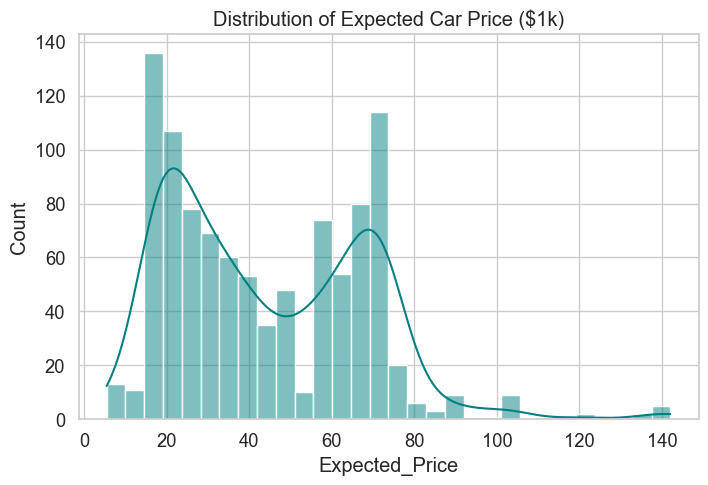

In [304]:
# Set the figure size to 8x5 inches for better visibility
plt.figure(figsize=(8, 5))

# Create a histogram to visualize the distribution of laptop prices
# 'bins=30' ensures the data is divided into 30 intervals
# 'kde=True' adds a Kernel Density Estimate (KDE) line to show the smooth probability distribution
sns.histplot(data["Expected_Price"], bins=30, kde=True, color="teal")

# Set the title of the plot
plt.title("Distribution of Expected Car Price ($1k)")

# Display the plot
plt.show()

In [236]:
numerical_features = data.select_dtypes(include='number').columns
len(numerical_features)

7

In [238]:
numerical_features

Index(['ZIP Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', 'Expected_Price'],
      dtype='object')

In [240]:
import warnings
warnings.filterwarnings('ignore')

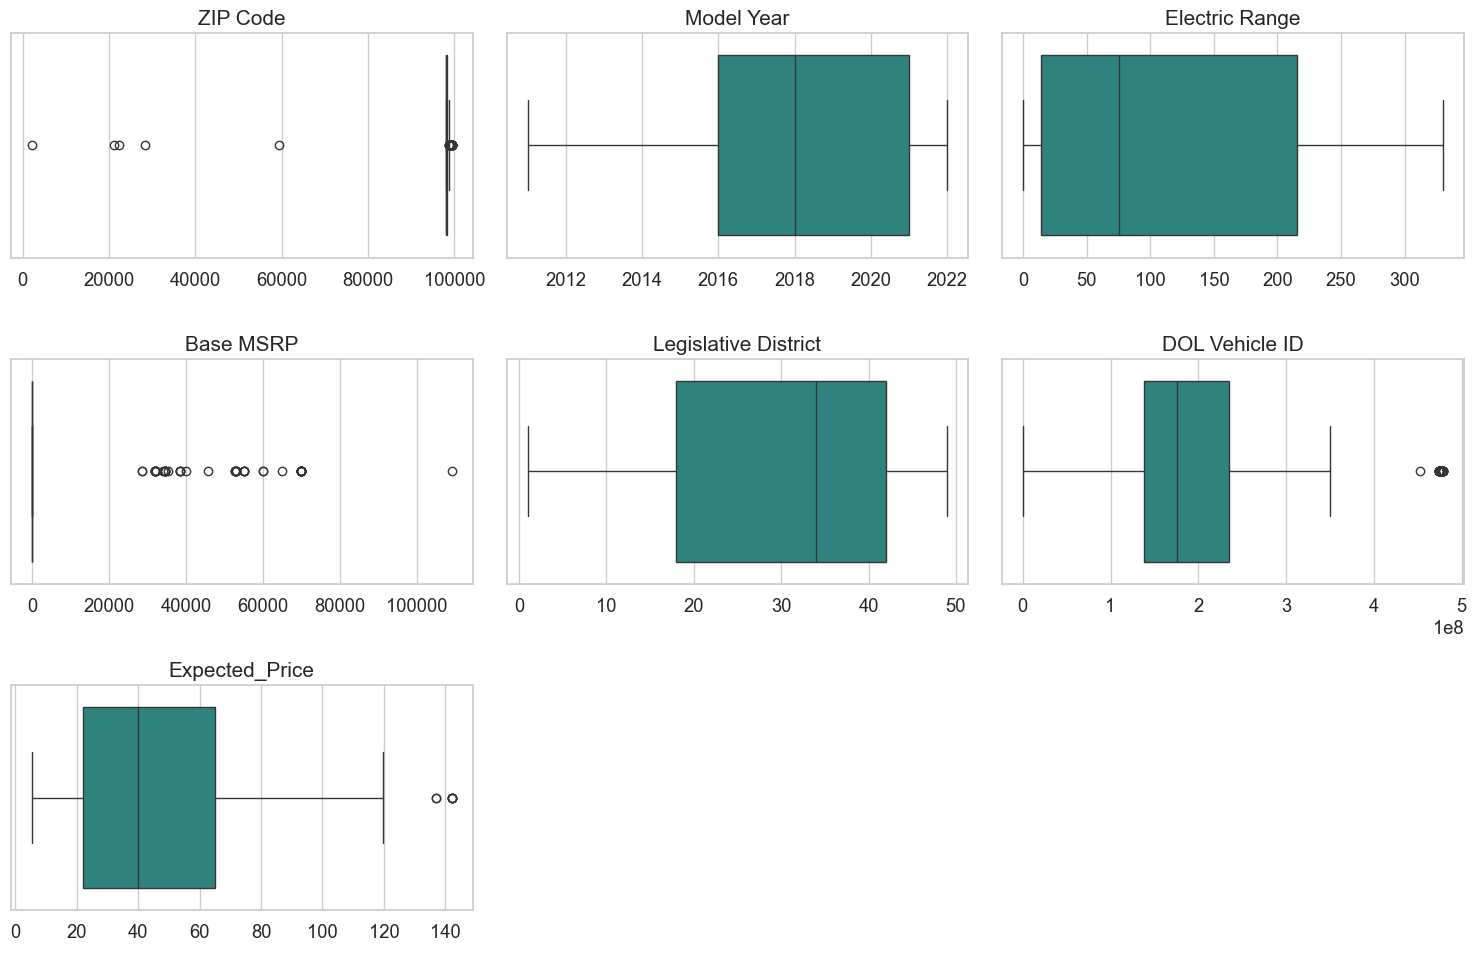

In [242]:
plt.figure(figsize=(15, 10))
for i in range(0, len(numerical_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x = data[numerical_features[i]], palette = 'viridis')
    plt.title(numerical_features[i], fontsize = 15)
    plt.xlabel(' ')
    plt.tight_layout()

In [244]:
categorical_features = data.select_dtypes(include='object').columns
len(categorical_features)

11

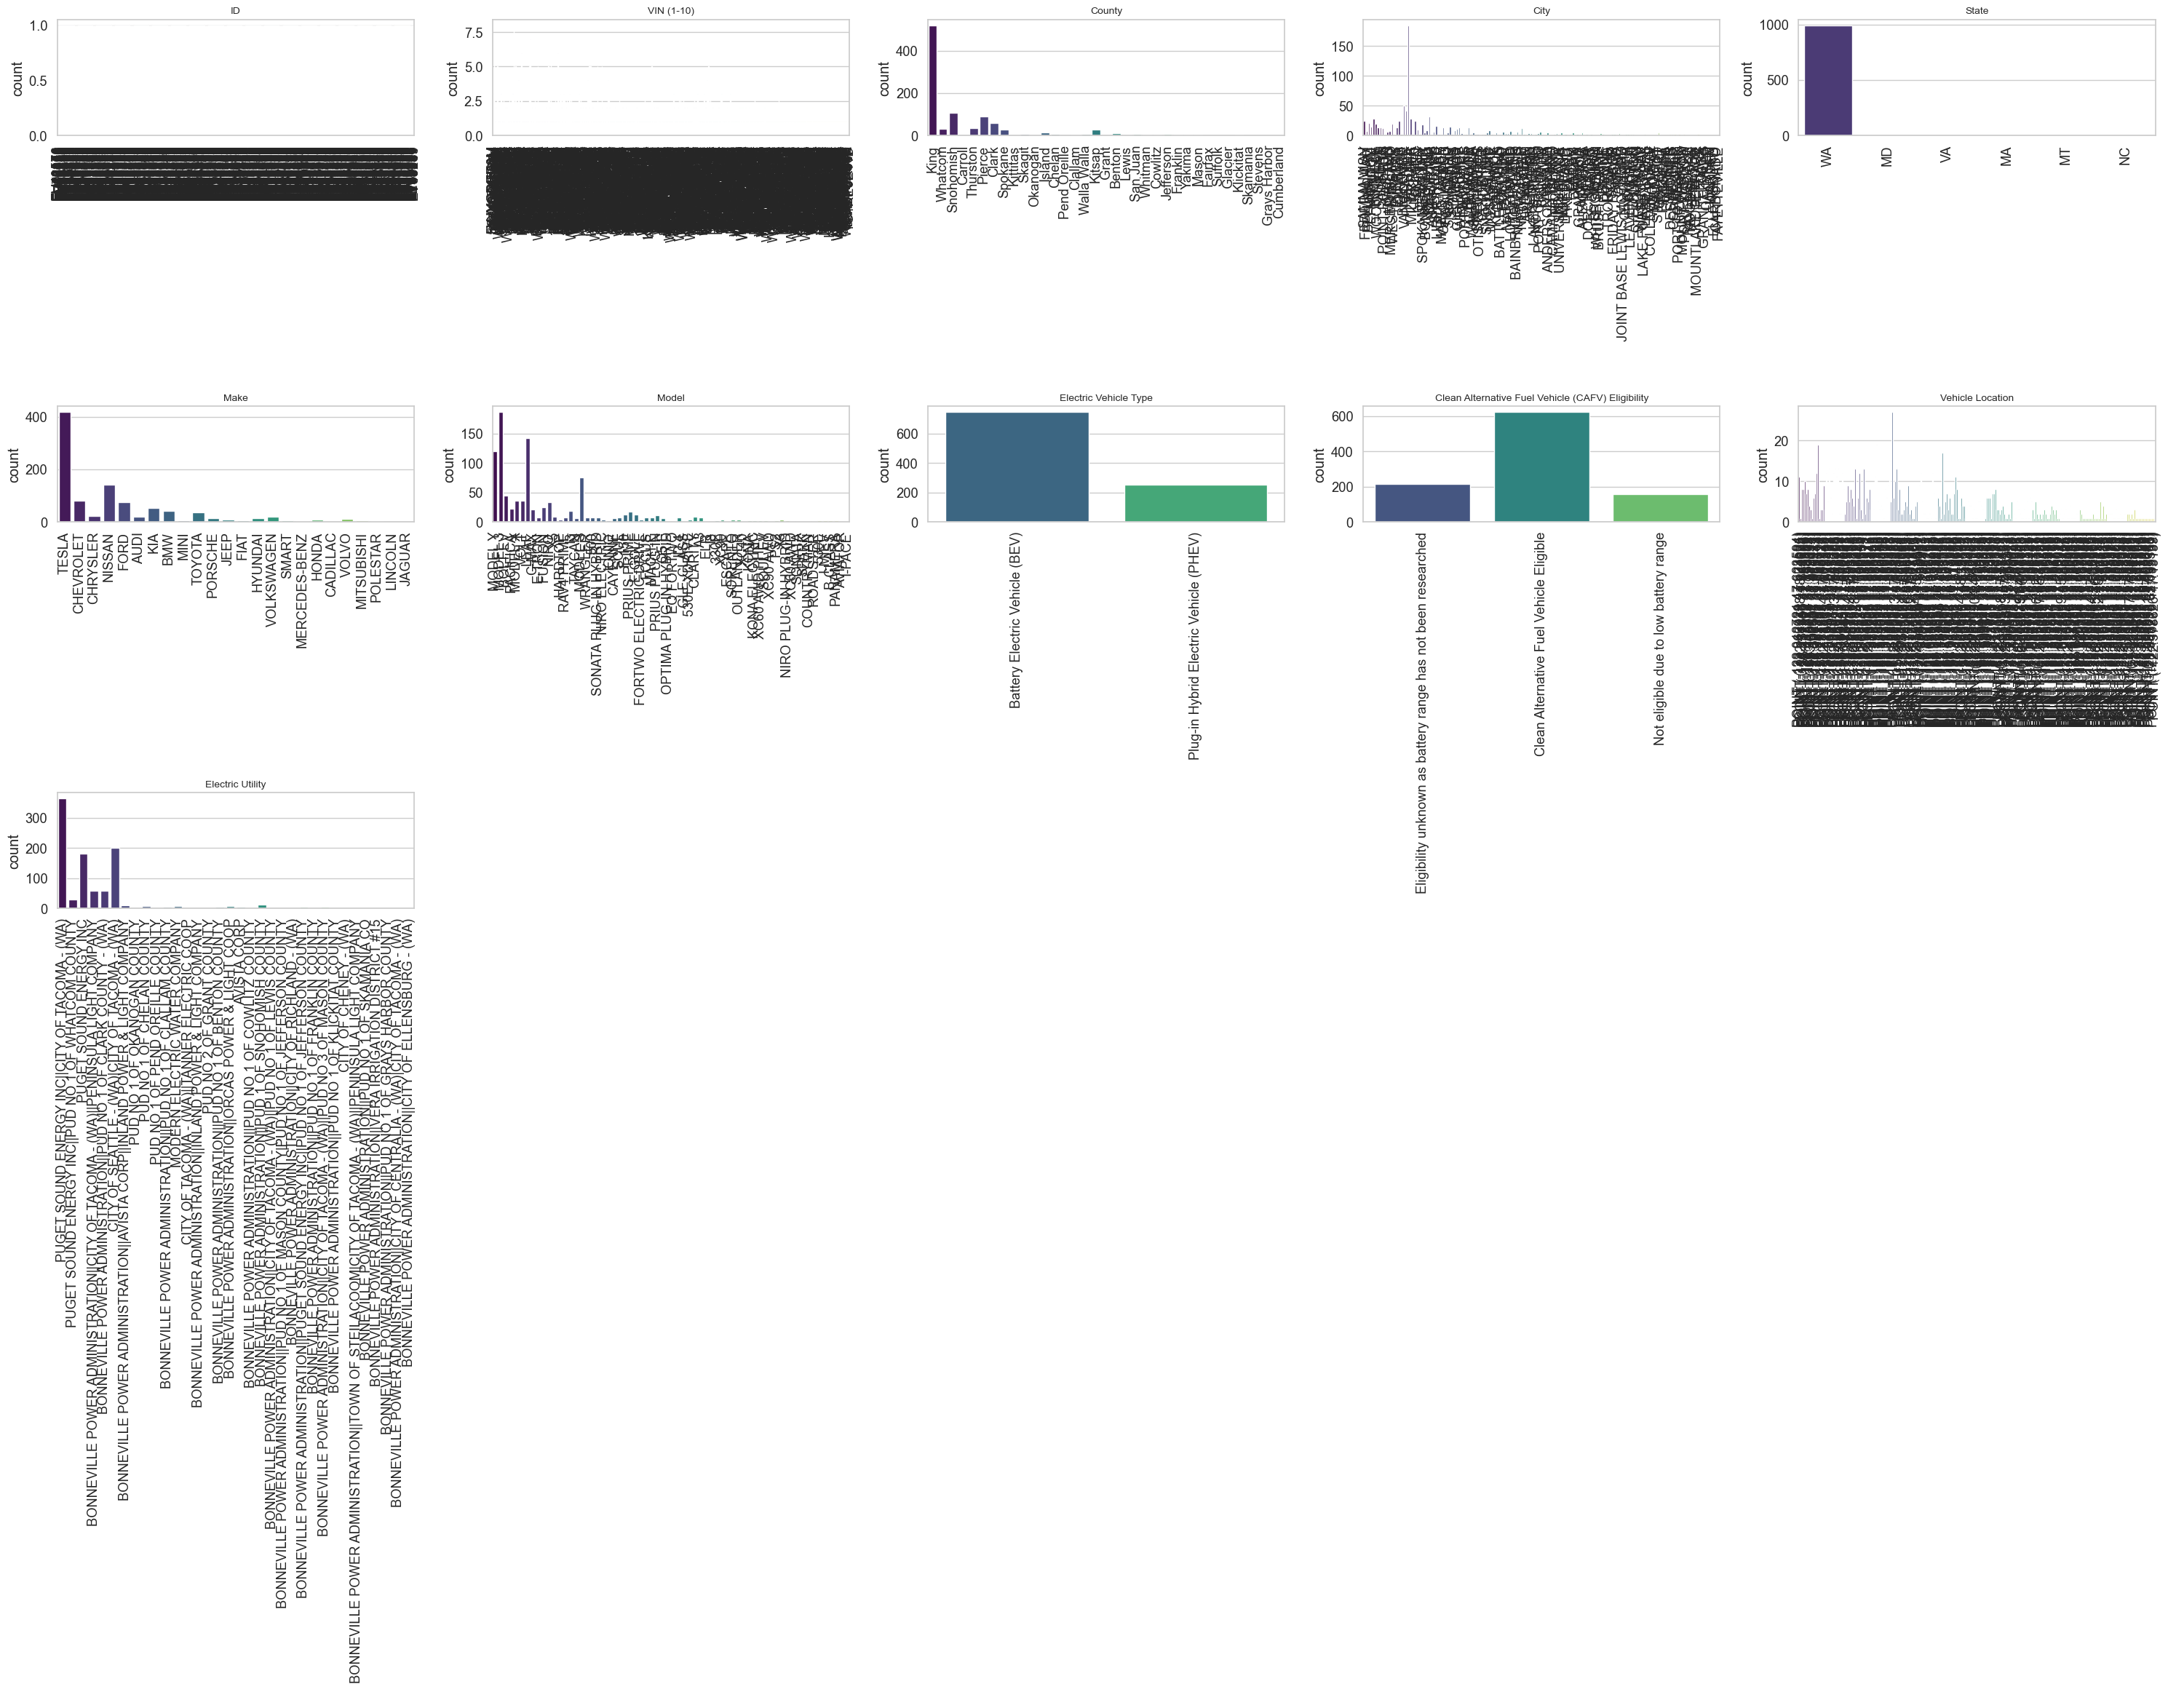

In [296]:
plt.figure(figsize=(30, 50))
for i in range(0, len(categorical_features)):
    plt.subplot(10, 5, i+1)
    sns.countplot(x = data[categorical_features[i]], palette = 'viridis')
    plt.title(categorical_features[i], fontsize = 10)
    plt.xlabel(' ')
    plt.xticks(rotation=90)
    plt.tight_layout()

In [256]:
# Display the value counts of each categorical feature
plt.figure(figsize=(10, 10))
for i in range(0, len(categorical_features)):
    # Print the value counts for each categorical feature
    print(f"Value counts for {categorical_features[i]}:")
    print(data[categorical_features[i]].value_counts())

Value counts for ID:
ID
EV40576    1
EV71741    1
EV63573    1
EV69805    1
EV82494    1
          ..
EV66671    1
EV88876    1
EV4099     1
EV40552    1
EV35241    1
Name: count, Length: 1000, dtype: int64
Value counts for VIN (1-10):
VIN (1-10)
5YJYGDEE8M    8
5YJYGDEE3M    7
5YJYGDEE2M    6
5YJ3E1EAXJ    6
5YJYGDEE1M    6
             ..
KMHC75LJ7M    1
JTDKN3DPXD    1
5YJSA1H1XE    1
5YJYGDEE4L    1
3FA6P0PU1F    1
Name: count, Length: 730, dtype: int64
Value counts for County:
County
King            521
Snohomish       108
Pierce           90
Clark            59
Thurston         35
Whatcom          30
Spokane          26
Kitsap           26
Island           14
Benton            9
San Juan          8
Chelan            8
Skagit            8
Walla Walla       6
Jefferson         6
Clallam           5
Mason             5
Cowlitz           4
Whitman           4
Grant             4
Lewis             3
Kittitas          3
Klickitat         3
Okanogan          2
Franklin          2
Yakima

<Figure size 1000x1000 with 0 Axes>

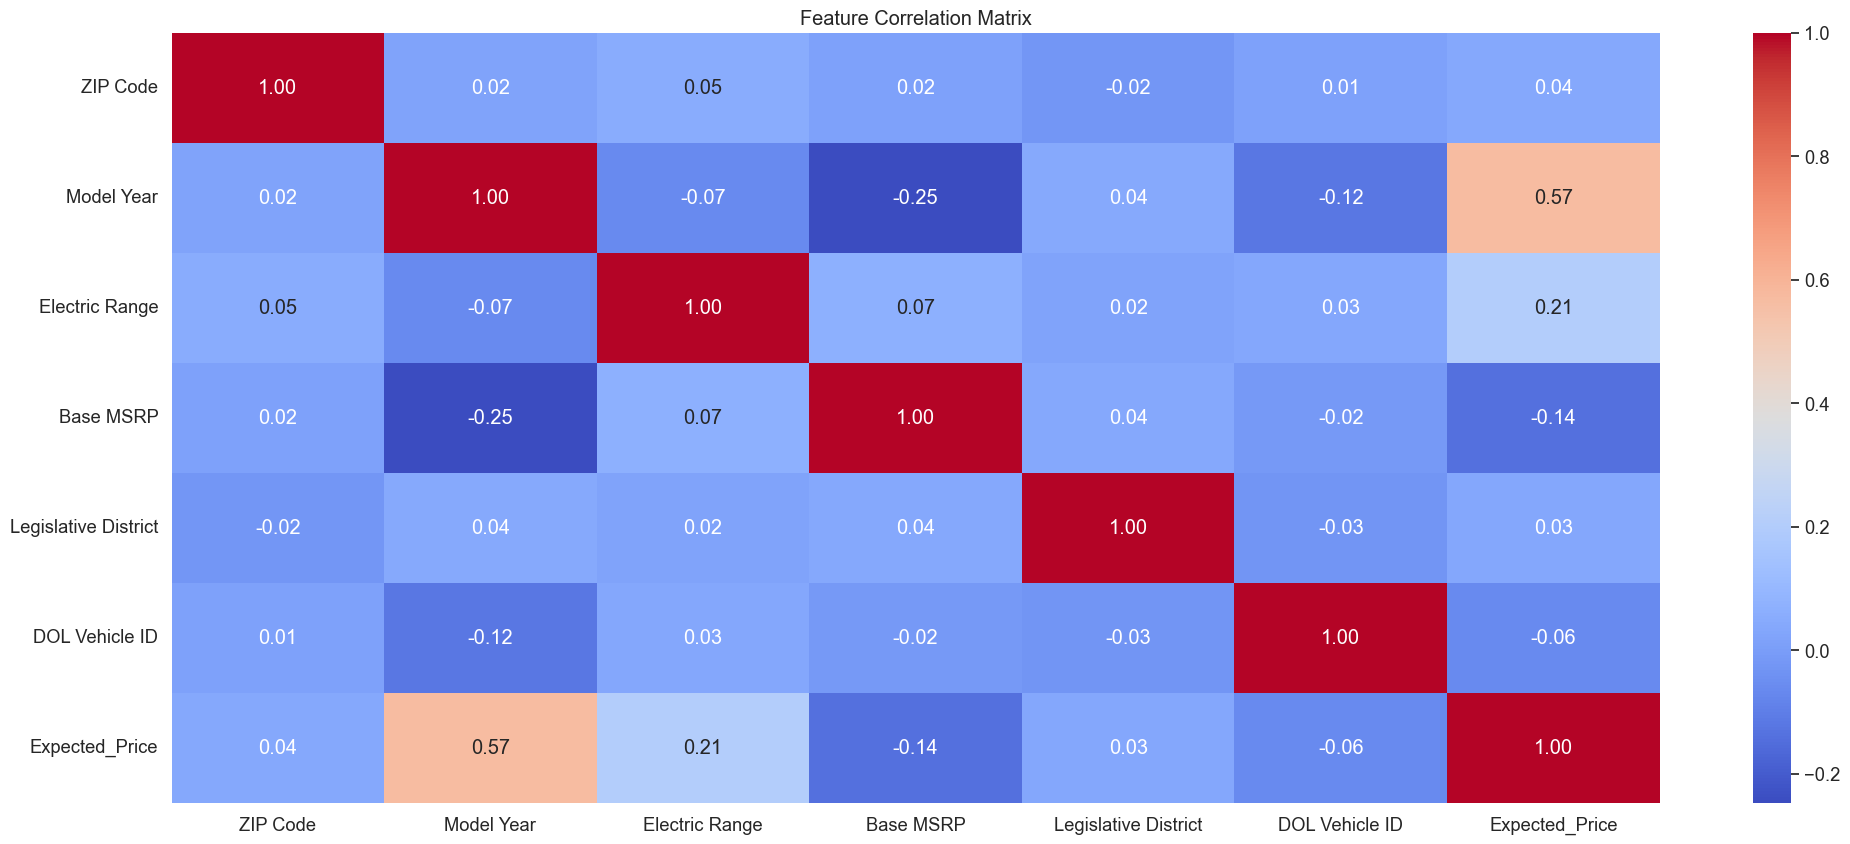

In [258]:
plt.figure(figsize=(24, 10))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

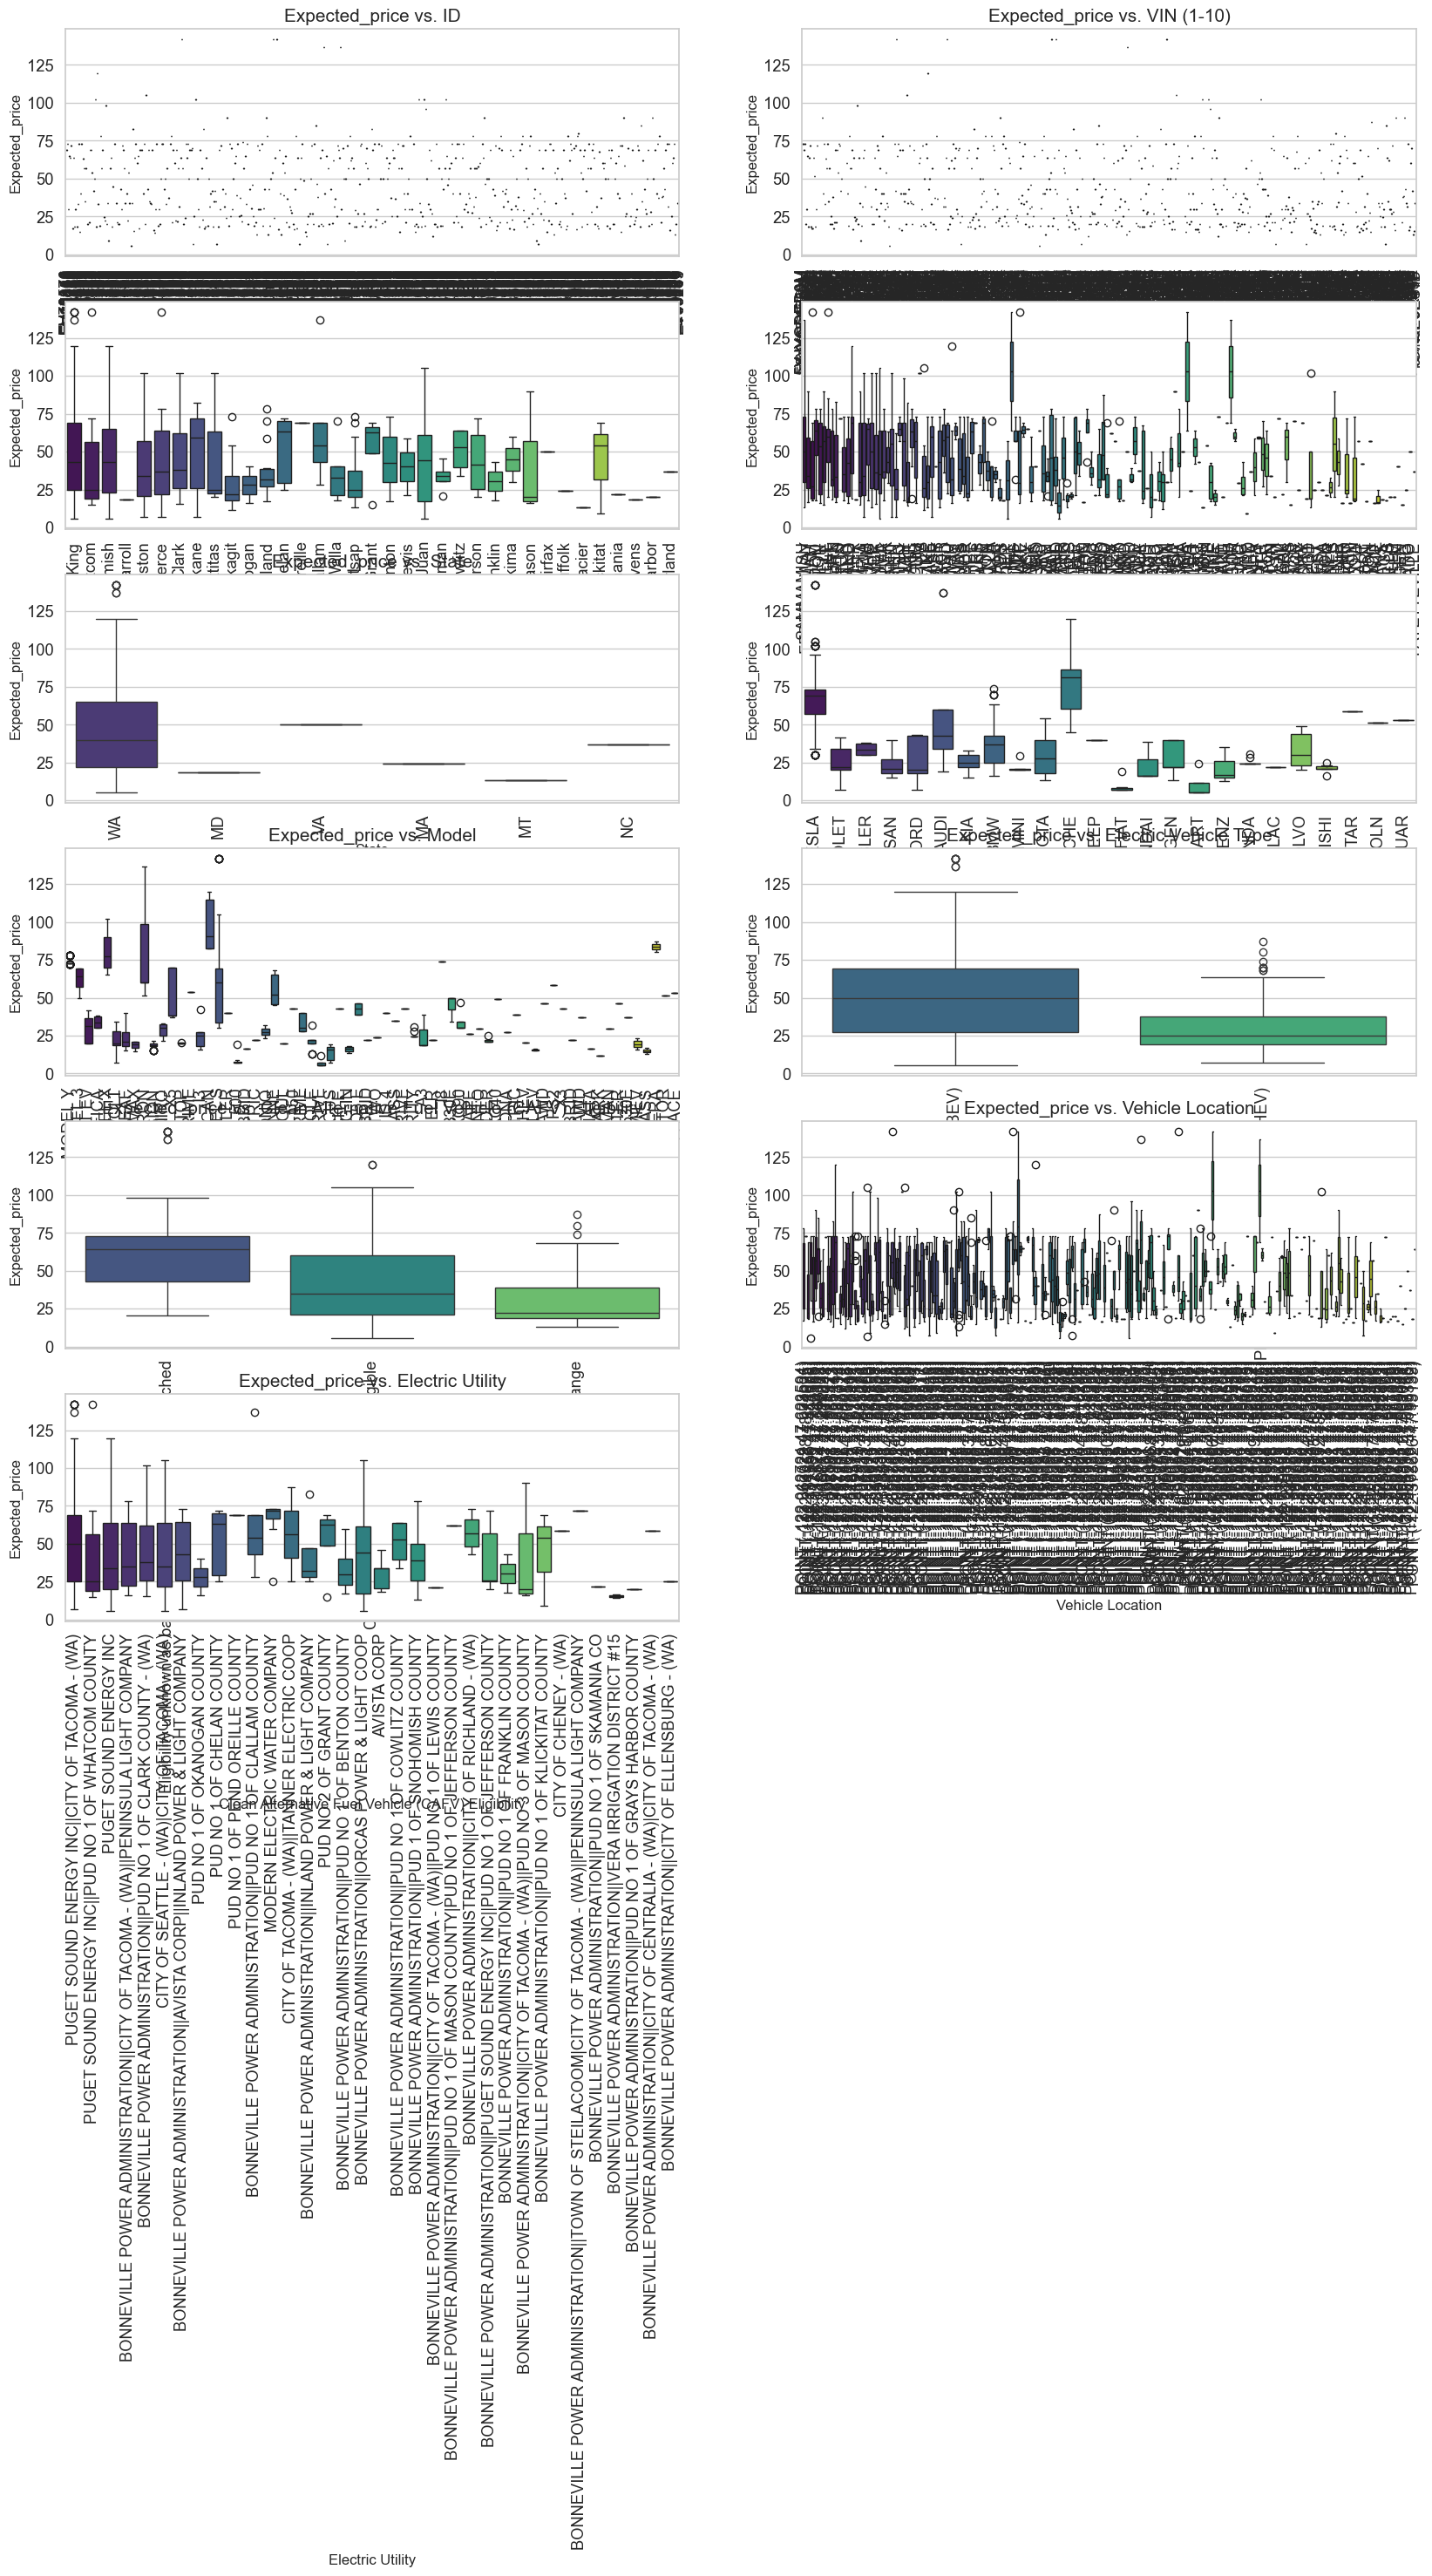

In [292]:
# Box Plot: SalePrice distribution across different categories
plt.figure(figsize=(20, 40))  # Reduce figure size for better visibility
for i in range(0, len(categorical_features)):
    plt.subplot(10, 2, i+1)  # Adjust grid to 2x3 (or whatever fits best)
    sns.boxplot(x=categorical_features[i], y='Expected_Price', data=data, palette='viridis')
    plt.title(f'Expected_price vs. {categorical_features[i]}', fontsize=15)
    plt.xlabel(categorical_features[i], fontsize=12)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.ylabel('Expected_price', fontsize=12)  # Add y-axis label for clarity

# Apply tight_layout after all subplots are created
plt.tight_layout()
plt.show()

In [306]:
# List of categorical columns to be encoded
categorical_cols = ["State", "Electric Vehicle Type", "Clean Alternative Fuel Vehicle (CAFV) Eligibility"]

# Apply one-hot encoding to the categorical columns
# - pd.get_dummies creates binary columns for each category in the categorical columns
# - 'drop_first=True' ensures that we drop the first column of each categorical feature to avoid multicollinearity
data = pd.get_dummies(data, columns=categorical_cols)

# Display the first few rows of the updated DataFrame to check the encoding
data.head()

,ID,VIN (1-10),County,City,ZIP Code,Model Year,Make,Model,Electric Range,Base MSRP,...,State_MD,State_MT,State_NC,State_VA,State_WA,Electric Vehicle Type_Battery Electric Vehicle (BEV),Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle Eligible,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Eligibility unknown as battery range has not been researched,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range
39347,EV40576,5YJYGDED3M,King,SAMMAMISH,98074.0,2021.0,TESLA,MODEL Y,0,0,...,False,False,False,False,True,True,False,False,True,False
58896,EV78171,5YJYGDEE0M,King,FEDERAL WAY,98023.0,2021.0,TESLA,MODEL Y,0,0,...,False,False,False,False,True,True,False,False,True,False
63149,EV13313,5YJ3E1EBXJ,Whatcom,BELLINGHAM,98225.0,2018.0,TESLA,MODEL 3,215,0,...,False,False,False,False,True,True,False,True,False,False
24759,EV37188,5YJYGDEE2M,Snohomish,LYNNWOOD,98036.0,2021.0,TESLA,MODEL Y,0,0,...,False,False,False,False,True,True,False,False,True,False
10446,EV10852,1G1FW6S07H,King,RENTON,98058.0,2017.0,CHEVROLET,BOLT EV,238,0,...,False,False,False,False,True,True,False,True,False,False


In [314]:
# Drop irrelevant columns and separate features (X) and target (y)
X = data.drop(columns=["ID", "VIN (1-10)", "County", "City", "Make", "Model", "Vehicle Location", "Expected_Price", "Electric Utility", "Base MSRP", "Legislative District", "DOL Vehicle ID"])  # Features
y = data["Expected_Price"]  # Target variable

In [316]:
X

,ZIP Code,Model Year,Electric Range,State_MA,State_MD,State_MT,State_NC,State_VA,State_WA,Electric Vehicle Type_Battery Electric Vehicle (BEV),Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle Eligible,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Eligibility unknown as battery range has not been researched,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range
39347,98074.0,2021.0,0,False,False,False,False,False,True,True,False,False,True,False
58896,98023.0,2021.0,0,False,False,False,False,False,True,True,False,False,True,False
63149,98225.0,2018.0,215,False,False,False,False,False,True,True,False,True,False,False
24759,98036.0,2021.0,0,False,False,False,False,False,True,True,False,False,True,False
10446,98058.0,2017.0,238,False,False,False,False,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41397,98105.0,2015.0,76,False,False,False,False,False,True,True,False,True,False,False
14826,98034.0,2021.0,0,False,False,False,False,False,True,True,False,False,True,False
5804,98632.0,2013.0,38,False,False,False,False,False,True,False,True,True,False,False
9896,98225.0,2015.0,84,False,False,False,False,False,True,True,False,True,False,False


In [318]:
# Split into Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [320]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test) #

In [322]:
from sklearn.linear_model import LinearRegression

# Initialize the model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_linear = linear_reg.predict(X_test_scaled)

# Evaluate the model
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression:\n RMSE: {rmse_linear:.4f}\n R²: {r2_linear:.4f}\n")

Linear Regression:
 RMSE: 499791342464.5084
 R²: -490135482961165025280.0000



In [324]:
from sklearn.linear_model import Ridge

# Initialize the model
ridge_reg = Ridge(alpha=1.0)

# Fit the model to the training data
ridge_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_ridge = ridge_reg.predict(X_test_scaled)

# Evaluate the model
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression:\n RMSE: {rmse_ridge:.4f}\n R²: {r2_ridge:.4f}\n")

Ridge Regression:
 RMSE: 16.6318
 R²: 0.4572



In [326]:
from sklearn.linear_model import ElasticNet

# Initialize the Elastic Net model
elastic_net = ElasticNet(alpha=0.1)

# Fit the model
elastic_net.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred_en = elastic_net.predict(X_test_scaled)

# Evaluate the model
rmse_en = np.sqrt(mean_squared_error(y_test, y_pred_en))
r2_en = r2_score(y_test, y_pred_en)

print(f"Elastic Net Regression:\n RMSE: {rmse_en:.4f}\n R²: {r2_en:.4f}\n")

Elastic Net Regression:
 RMSE: 16.8167
 R²: 0.4451



In [328]:
from sklearn.svm import SVR

# Initialize the model
svr_reg = SVR(kernel='linear')

# Fit the model to the training data
svr_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_svr = svr_reg.predict(X_test_scaled)

# Evaluate the model
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression:\n RMSE: {rmse_svr:.4f}\n R²: {r2_svr:.4f}\n")

Support Vector Regression:
 RMSE: 17.0394
 R²: 0.4303



In [330]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the model
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_knn = knn_reg.predict(X_test_scaled)

# Evaluate the model
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors:\n RMSE: {rmse_knn:.4f}\n R²: {r2_knn:.4f}\n")

K-Nearest Neighbors:
 RMSE: 12.9658
 R²: 0.6701



In [332]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
tree_reg = DecisionTreeRegressor()

# Fit the model to the training data
tree_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_tree = tree_reg.predict(X_test_scaled)

# Evaluate the model
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regressor:\n RMSE: {rmse_tree:.4f}\n R²: {r2_tree:.4f}\n")

Decision Tree Regressor:
 RMSE: 13.4928
 R²: 0.6428



In [334]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
forest_reg = RandomForestRegressor()

# Fit the model to the training data
forest_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_forest = forest_reg.predict(X_test_scaled)

# Evaluate the model
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Random Forest Regressor:\n RMSE: {rmse_forest:.4f}\n R²: {r2_forest:.4f}\n")

Random Forest Regressor:
 RMSE: 12.1830
 R²: 0.7088



In [336]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb_reg = GradientBoostingRegressor()

# Fit the model to the training data
gb_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_reg.predict(X_test)

# Evaluate the model
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regressor:\n RMSE: {rmse_gb:.4f}\n R²: {r2_gb:.4f}\n")

Gradient Boosting Regressor:
 RMSE: 11.2438
 R²: 0.7519



In [338]:
# Importing LightGBM
import xgboost as xgb

In [340]:
# Initialize the model with some parameters
xgb_reg = xgb.XGBRegressor()

# Fit the model
xgb_reg.fit(X_train, y_train)

# Predicting on test data
y_pred_xgb = xgb_reg.predict(X_test)


# Evaluate the model
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regressor:\n RMSE: {rmse_xgb:.4f}\n R²: {r2_xgb:.4f}\n")

XGBoost Regressor:
 RMSE: 13.7946
 R²: 0.6266



In [342]:
# Importing LightGBM
import lightgbm as lgb

In [356]:

# Initialize the model with default parameters
lgb_reg = lgb.LGBMRegressor()

# Fit the model
lgb_reg.fit(X_train, y_train)

# Predicting on test data
y_pred_lgb = lgb_reg.predict(X_test)

# Evaluate the model
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM Regressor:\n RMSE: {rmse_lgb:.4f}\n R²: {r2_lgb:.4f}")

LightGBM Regressor:
 RMSE: 12.3449
 R²: 0.7010


In [354]:
lgb_reg = lgb.LGBMRegressor( 
    verbose=-1
)
lgb_reg.fit(X_train, y_train)

LGBMRegressor(verbose=-1)